In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import sympy 

In [0]:
from sklearn.preprocessing import Imputer

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('/home/selintosun/Downloads/breast-cancer-data.csv', header=None)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
column_names = ['Sample_id', 'Clump_Thickness', 'Unif_Cell_Size', 'Unif_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [0]:
data.columns = column_names
data.head(10)

,Sample_id,Clump_Thickness,Unif_Cell_Size,Unif_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample_id                      699 non-null int64
Clump_Thickness                699 non-null int64
Unif_Cell_Size                 699 non-null int64
Unif_Cell_Shape                699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    699 non-null object
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [0]:
data.Bare_Nuclei.describe()

count     699
unique     11
top         1
freq      402
Name: Bare_Nuclei, dtype: object

In [0]:
(data[pd.to_numeric(data['Bare_Nuclei'], errors='coerce').isnull()])

,Sample_id,Clump_Thickness,Unif_Cell_Size,Unif_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [0]:
data['Bare_Nuclei_missing'] = (data['Bare_Nuclei'] == '?')*1

In [0]:
len(data[pd.to_numeric(data['Bare_Nuclei'], errors='coerce').isnull()])

16

In [0]:
data.Bare_Nuclei.describe()

count     699
unique     11
top         1
freq      402
Name: Bare_Nuclei, dtype: object

In [0]:
data['Bare_Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [0]:
data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors='coerce')

In [0]:
data.Bare_Nuclei.dtype

dtype('float64')

In [0]:
data.Bare_Nuclei.describe()

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: Bare_Nuclei, dtype: float64

In [0]:
print data['Bare_Nuclei']

0       1.0
1      10.0
2       2.0
3       4.0
4       1.0
5      10.0
6      10.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      3.0
13      3.0
14      9.0
15      1.0
16      1.0
17      1.0
18     10.0
19      1.0
20     10.0
21      7.0
22      1.0
23      NaN
24      1.0
25      7.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
669     5.0
670     8.0
671     1.0
672     1.0
673     1.0
674     1.0
675     1.0
676     1.0
677     1.0
678     1.0
679     1.0
680    10.0
681    10.0
682     1.0
683     1.0
684     1.0
685     1.0
686     1.0
687     1.0
688     1.0
689     1.0
690     1.0
691     5.0
692     1.0
693     1.0
694     2.0
695     1.0
696     3.0
697     4.0
698     5.0
Name: Bare_Nuclei, Length: 699, dtype: float64


In [0]:
data.fillna(3.544656, inplace=True)

In [0]:
subdata = data[['Clump_Thickness', 'Unif_Cell_Size', 'Unif_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]

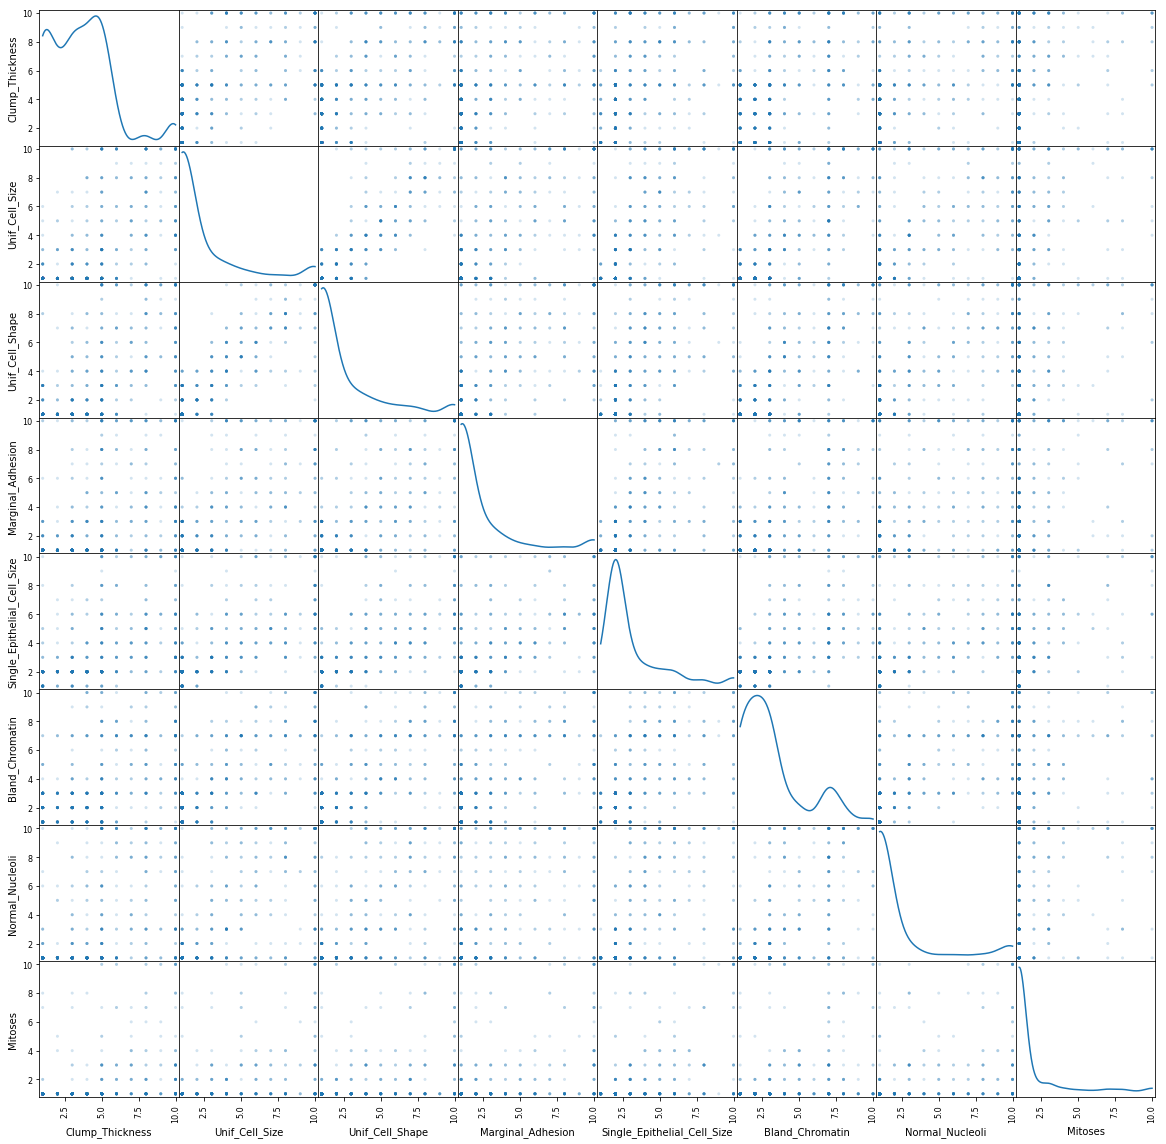

In [0]:
scatter_matrix(subdata, alpha=0.2, figsize=(20, 20), diagonal='kde');
# The below graph is showing cell size and cell shape are highly correlated. I will check for the other dependency. 

In [0]:
reduced_form, inds = sympy.Matrix(data.values).rref()
inds

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [0]:
len(data.iloc[:, inds]) #seems like there is no direct collinearity. 

699

In [0]:
data = data.astype("float64")

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
Sample_id                      699 non-null float64
Clump_Thickness                699 non-null float64
Unif_Cell_Size                 699 non-null float64
Unif_Cell_Shape                699 non-null float64
Marginal_Adhesion              699 non-null float64
Single_Epithelial_Cell_Size    699 non-null float64
Bare_Nuclei                    699 non-null float64
Bland_Chromatin                699 non-null float64
Normal_Nucleoli                699 non-null float64
Mitoses                        699 non-null float64
Class                          699 non-null float64
Bare_Nuclei_missing            699 non-null float64
dtypes: float64(12)
memory usage: 65.6 KB


In [0]:
data.head(30)

,Sample_id,Clump_Thickness,Unif_Cell_Size,Unif_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,Bare_Nuclei_missing
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.000000,3.0,1.0,1.0,2.0,0.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.000000,3.0,2.0,1.0,2.0,0.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.000000,3.0,1.0,1.0,2.0,0.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.000000,3.0,7.0,1.0,2.0,0.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.000000,3.0,1.0,1.0,2.0,0.0
5,1017122.0,8.0,10.0,10.0,8.0,7.0,10.000000,9.0,7.0,1.0,4.0,0.0
6,1018099.0,1.0,1.0,1.0,1.0,2.0,10.000000,3.0,1.0,1.0,2.0,0.0
7,1018561.0,2.0,1.0,2.0,1.0,2.0,1.000000,3.0,1.0,1.0,2.0,0.0
8,1033078.0,2.0,1.0,1.0,1.0,2.0,1.000000,1.0,1.0,5.0,2.0,0.0
9,1033078.0,4.0,2.0,1.0,1.0,2.0,1.000000,2.0,1.0,1.0,2.0,0.0


In [0]:
y = data['Class']

In [0]:
y2 = y[y == 2]
y4 = y[y == 4]

In [0]:
print len(y2)
print len(y4) # Checking for whether the data is imbalanced 

458
241


In [0]:
X = data[['Clump_Thickness', 'Unif_Cell_Size', 'Unif_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Bare_Nuclei_missing']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
clf = RandomForestClassifier(max_depth=2, random_state=0, n_jobs=-1)

In [0]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [0]:
clf.feature_importances_

array([ 0.05057693,  0.27588509,  0.18586979,  0.00198292,  0.16913916,
        0.01374256,  0.2122989 ,  0.08710919,  0.        ,  0.00339545])

In [0]:
clf.predict(X_test)

array([ 2.,  2.,  2.,  4.,  2.,  2.,  2.,  4.,  4.,  2.,  2.,  4.,  2.,
        2.,  2.,  4.,  2.,  4.,  4.,  4.,  4.,  2.,  4.,  2.,  4.,  2.,
        2.,  4.,  2.,  4.,  2.,  2.,  2.,  4.,  2.,  2.,  2.,  4.,  2.,
        4.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  4.,  2.,  4.,  2.,  2.,
        4.,  2.,  4.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  4.,  2.,  2.,
        2.,  4.,  4.,  2.,  2.,  4.,  2.,  4.,  2.,  2.,  2.,  2.,  4.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  4.,  2.,  2.,  2.,  2.,
        2.,  4.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,
        4.,  2.,  4.,  2.,  2.,  4.,  4.,  2.,  2.,  2.,  2.,  4.,  2.,
        2.,  2.,  2.,  2.,  4.,  2.,  2.,  4.,  4.,  2.,  2.,  4.,  4.,
        2.,  2.,  4.,  2.,  4.,  2.,  4.,  2.,  2.,  2.])

In [0]:
clf.score(X_test, y_test)

0.9642857142857143

In [0]:
clf.score(X_train, y_train)

0.96958855098389984

The above 2 lines show the RandomForest Classifier model score (accuracy) on test and train models. The accuracy is 97 % on the training set, and 96.4 % on the test set. These values being close to each other shows that the model does not have high variance, and generalizing the model to the data accurately. 

In [0]:
y_predict = clf.predict(X_test)

In [0]:
confusion_matrix(y_test, y_predict)

array([[92,  3],
       [ 2, 43]])

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
classes=[2.0, 4.0]
classes

[2.0, 4.0]

Normalized confusion matrix
[[ 0.96842105  0.03157895]
 [ 0.04444444  0.95555556]]


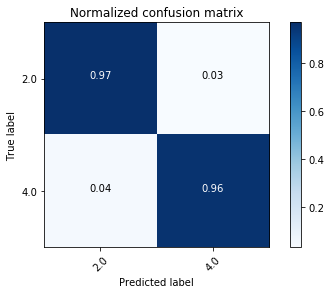

In [0]:
plt.figure()
import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_predict), classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Here is the confusion matrix obtained from RandomForest Classifier. I will check GradientBoostingClassifier as well to see if I can obtain a better result.

In [0]:
from sklearn.metrics import roc_curve, auc

In [0]:
# overall accuracy
acc = clf.score(X_test,y_test)

# get roc/auc info
y_score = clf.estimator_params(X_test)
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 

TypeError: 'tuple' object is not callable

In [0]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_predict)

ValueError: Data is not binary and pos_label is not specified

#### GradientBoostingClassifier Section

In [0]:
clf_GB = GradientBoostingClassifier(random_state=0)

In [0]:
clf_GB.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [0]:
clf_GB.feature_importances_

array([ 0.1079837 ,  0.17069145,  0.14823318,  0.0925412 ,  0.05998366,
        0.16649211,  0.09874849,  0.1243893 ,  0.0142271 ,  0.01670981])

In [0]:
y_GB_pred = clf_GB.predict(X_test)

In [0]:
clf_GB.score(X_test, y_test)

0.94999999999999996

In [0]:
clf_GB.score(X_train, y_train)

1.0

Training score is 1 while the test score is 0.95. This difference may indicate some overfitting compared to RandomForest. 

In [0]:
confusion_matrix(y_test, y_GB_pred)

array([[92,  3],
       [ 4, 41]])

Normalized confusion matrix
[[ 0.96842105  0.03157895]
 [ 0.08888889  0.91111111]]


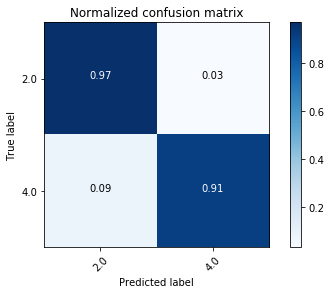

In [0]:
plt.figure()
import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_GB_pred), classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
importances = clf_GB.feature_importances_

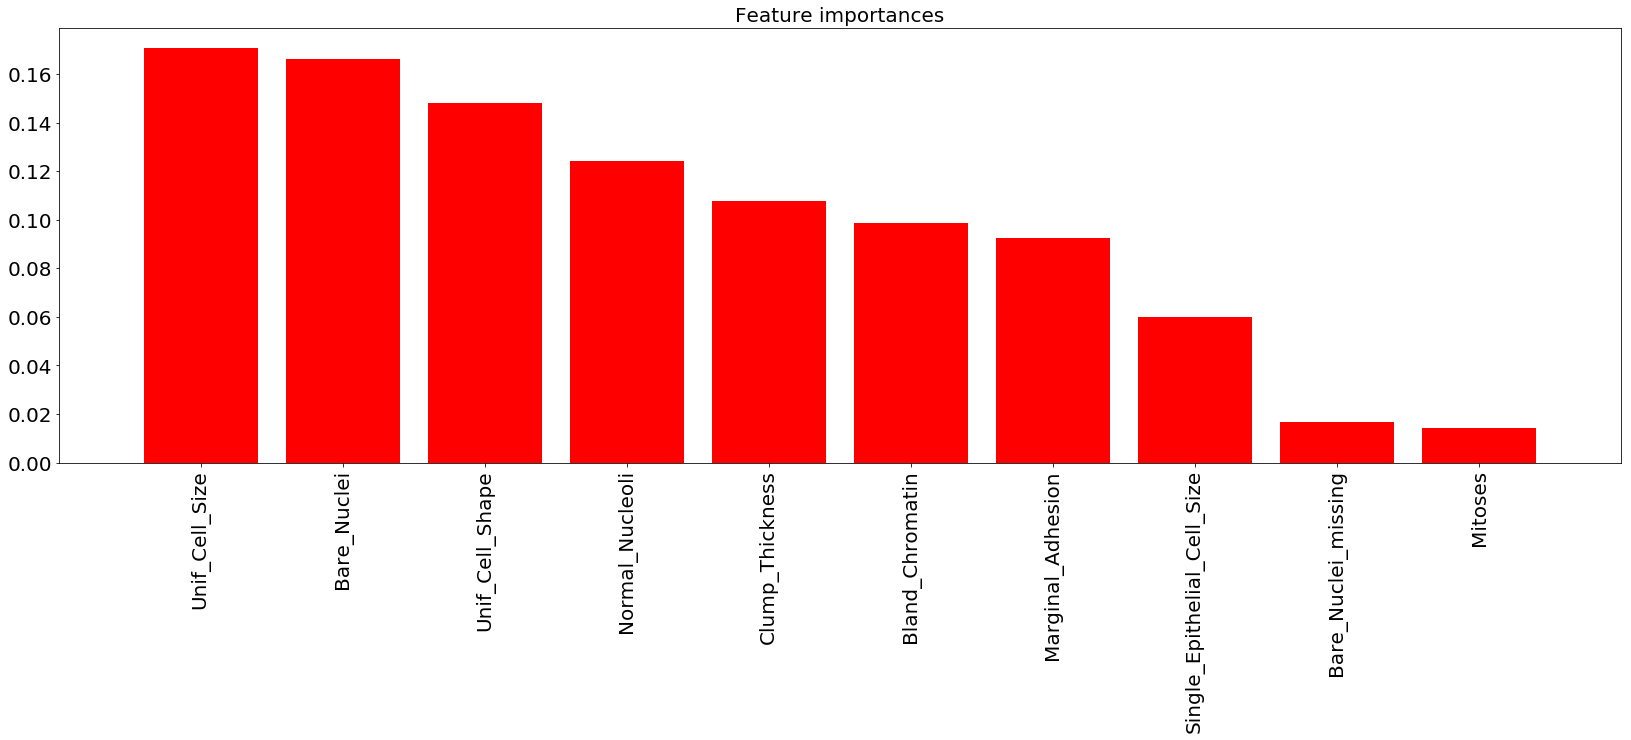

In [0]:
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(28,8))
plt.title("Feature importances", fontsize=20)
plt.bar(range(X.shape[1])[:10], importances[indices][:10],
       color="r", align="center")
plt.xticks(range(X.shape[1])[:10], X.columns[indices][:10],rotation='vertical', fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-1, 10])
plt.show();

#### Let's compare the confusion matrix from RandomForest and GradientBoosting: 

* TN_RF = 0.97, 
* TP_RF = 0.96, 
* FN_RF = 0.04, and 
* FP_RF = 0.03 while assuming 2 is negative, and 4 is postive. (2:benign, 4: malignant): This means when we detect 4 we detect Cancer. 

* TN_GB = 0.97
* TP_GB = 0.91
* FN_GB = 0.09
* FP_GB = 0.03 

Here RF shows higher precition and more importantly it is perfoming better with detecting the FN's (when there is cancer eventhough test comes negative). Since it is important to catch the real cancer possibility, then treating the non-cancer having patients (FP) - the difference is one can continue living, while the cost on the other side is having weak and cancer treatment side effects... - I prefer to go with RandomForest Predictor.  

#### Additional Note: 

The feature importance can be plotted only on gradientboosting using sklearn. This shows which parameters are more important in our model. From the above diagram, we can see that the Uniform Cell Size is the biggest contributor for the cancel detection. Later, the Bare Nuclei and uniformity of cell shape are coming. It looks like the missing values in the Bare_Nuclei is not very effective in the model. We could have very well drop those rows and build our model on the existing data set. Nonetheless, any information (even missing information) is data, and it is always a good practice to try to make sense out of those as well other than throwing them away. There might be a reason that data is missing, and maybe it is systematically missing on the beging or malignant cells. We can not know this before the modelling. This GB modeling is showing that the missing info (row) are not as important as the other columns. 

#### We can apply a gridsearch to optimize the hyperparameters of the RandomForest and GradientBoosting, and see if we can obtain better results.

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [0]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_repeated=0, n_classes=2, random_state=0, shuffle=False)

In [0]:
rfc = RandomForestClassifier(n_jobs=-1, max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

In [0]:
param_grid = {'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': range(1,11)}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Below is the gridsearch results from RandomForrest without searching he max_depth. 

In [0]:
CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 200}

In [0]:
RF_Best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [0]:
RF_Best.fit(X_train, y_train)
y_predict = RF_Best.predict(X_test).astype(int)
y_true = y_test.as_matrix()
RF_Best.score(X_test, y_test)

0.97142857142857142

In [0]:
y_RFBest_predict = RF_Best.predict(X_test)

In [0]:
confusion_matrix(y_test, y_RFBest_predict)

array([[93,  2],
       [ 2, 43]])

Normalized confusion matrix
[[ 0.97894737  0.02105263]
 [ 0.04444444  0.95555556]]


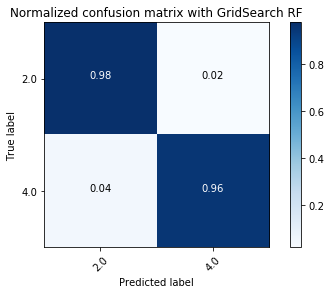

In [0]:
plt.figure()
import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_RFBest_predict), classes=classes, normalize=True,
                      title='Normalized confusion matrix with GridSearch RF')

plt.show()

The above gridsearch result from RandomForest resulted in slightly better FP value, while the other values are more less staying the same. I would say, there is not much of a difference. The score/accuracy is better than before : 97.14 % on the test set. 

In [0]:
CV_rfc.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 700}

In [0]:
RF_w_max_depth = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [0]:
RF_w_max_depth.fit(X_train, y_train)
y_predict = RF_w_max_depth.predict(X_test).astype(int)
y_true = y_test.as_matrix()
RF_w_max_depth.score(X_test, y_test)

0.9642857142857143

In [0]:
y_RFBest_predict = RF_w_max_depth.predict(X_test)
confusion_matrix(y_test, y_RFBest_predict)

array([[93,  2],
       [ 3, 42]])

Normalized confusion matrix
[[ 0.97894737  0.02105263]
 [ 0.06666667  0.93333333]]


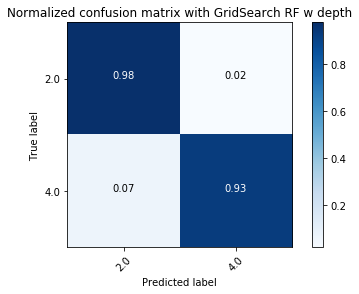

In [0]:
plt.figure()
import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_RFBest_predict), classes=classes, normalize=True,
                      title='Normalized confusion matrix with GridSearch RF w depth')

plt.show()

Clearly, the no depth for the trees was showing a better fit. The best fitting condition fro RandomForest is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [0]:
importances = RF_Best.feature_importances_
%matplotlib.style('ggplot')

ERROR:root:Line magic function `%matplotlib.style` not found.


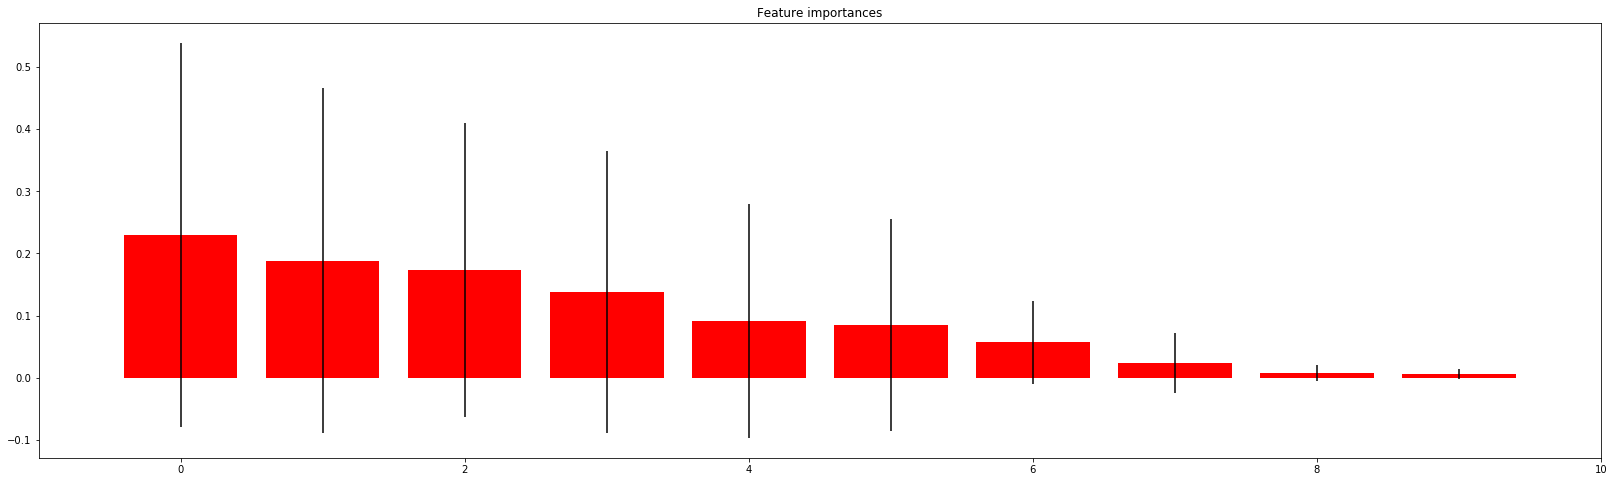

In [0]:
importances = RF_Best.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_Best.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(28,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), X.columns[indices],rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show();

In [0]:
from sklearn import metrics

In [0]:
probs = RF_Best.predict_proba(X_test)

In [0]:
probs

array([[ 0.97 ,  0.03 ],
       [ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 0.17 ,  0.83 ],
       [ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 0.89 ,  0.11 ],
       [ 0.03 ,  0.97 ],
       [ 0.18 ,  0.82 ],
       [ 0.785,  0.215],
       [ 1.   ,  0.   ],
       [ 0.235,  0.765],
       [ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 0.03 ,  0.97 ],
       [ 1.   ,  0.   ],
       [ 0.02 ,  0.98 ],
       [ 0.105,  0.895],
       [ 0.27 ,  0.73 ],
       [ 0.   ,  1.   ],
       [ 1.   ,  0.   ],
       [ 0.23 ,  0.77 ],
       [ 1.   ,  0.   ],
       [ 0.075,  0.925],
       [ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 0.035,  0.965],
       [ 0.855,  0.145],
       [ 0.025,  0.975],
       [ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 0.135,  0.865],
       [ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 0.   ,  1.   ],
       [ 1.   ,  0.   ],
       [ 0.095,  0.905],


In [0]:
probs[:, 0]

array([ 0.97 ,  1.   ,  1.   ,  0.17 ,  1.   ,  1.   ,  0.89 ,  0.03 ,
        0.18 ,  0.785,  1.   ,  0.235,  1.   ,  1.   ,  1.   ,  0.03 ,
        1.   ,  0.02 ,  0.105,  0.27 ,  0.   ,  1.   ,  0.23 ,  1.   ,
        0.075,  1.   ,  1.   ,  0.035,  0.855,  0.025,  1.   ,  1.   ,
        1.   ,  0.135,  1.   ,  1.   ,  1.   ,  0.   ,  1.   ,  0.095,
        1.   ,  0.835,  0.025,  1.   ,  1.   ,  1.   ,  0.995,  0.46 ,
        0.98 ,  0.605,  0.935,  1.   ,  0.005,  1.   ,  0.635,  0.985,
        1.   ,  0.005,  1.   ,  1.   ,  1.   ,  1.   ,  0.12 ,  0.995,
        1.   ,  1.   ,  0.005,  0.06 ,  0.955,  1.   ,  0.05 ,  1.   ,
        0.05 ,  1.   ,  1.   ,  1.   ,  1.   ,  0.18 ,  1.   ,  1.   ,
        1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  0.   ,  0.47 ,  1.   ,
        1.   ,  1.   ,  1.   ,  1.   ,  0.02 ,  0.845,  1.   ,  0.055,
        1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  0.97 ,  1.   ,  0.13 ,
        0.475,  1.   ,  0.09 ,  0.995,  1.   ,  0.19 ,  0.19 ,  0.905,
      

In [0]:
y_test

158    2.0
499    2.0
396    2.0
155    4.0
321    2.0
212    2.0
234    2.0
289    4.0
300    4.0
356    4.0
672    2.0
328    4.0
199    2.0
78     2.0
598    2.0
569    4.0
446    2.0
506    4.0
626    4.0
603    4.0
360    4.0
338    2.0
668    4.0
290    2.0
284    4.0
331    2.0
477    2.0
54     4.0
248    2.0
223    4.0
      ... 
259    2.0
422    2.0
6      2.0
101    4.0
542    2.0
299    4.0
395    2.0
501    2.0
318    2.0
145    2.0
486    2.0
353    4.0
208    2.0
695    2.0
361    4.0
86     4.0
664    2.0
481    2.0
633    4.0
41     4.0
108    2.0
690    2.0
56     4.0
424    2.0
514    4.0
24     2.0
218    4.0
431    2.0
281    2.0
110    2.0
Name: Class, Length: 140, dtype: float64

In [0]:
y_test_binary = []
for y in y_test:
    if y == 2.0:
        y_test_binary.append(1)
    elif y == 4.0:
        y_test_binary.append(0)
        
print len(y_test_binary)
print len(y_test)

140
140


In [0]:
fpr, tpr, threshs = metrics.roc_curve(y_test_binary, probs[:, 0])

In [0]:
y_test.shape[0]

140

In [0]:
n_classes = len(y_test_binary)
#for i in range(n_classes):
fpr, tpr, _ = roc_curve(y_test_binary, probs)
roc_auc = auc(fpr, tpr)

ValueError: bad input shape (140, 2)

In [0]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show();

NameError: name 'roc_auc' is not defined

In [0]:
from sklearn.preprocessing import label_binarize